In [7]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
dataset = randn(25)

# 1.カーネル密度推定とは?
なめらかなヒストグラムを描くイメージ

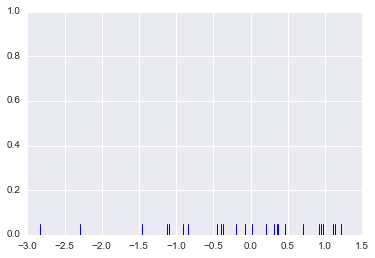

In [10]:
#データがあるところに線が書かれる
sns.rugplot(dataset)

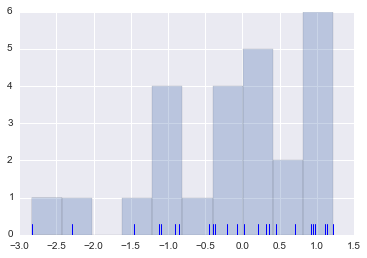

In [11]:
#ヒストグラム＋rugplot
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

データが高くなるところではヒストグラムが高くなる

## この標本データを用いてカーネル密度推定を行う

よく使う推定量は次であり、この推定量を用いてカーネル密度推定を行う
<font size="5">
$$
h={ \left( \cfrac { 4{ \widehat { \sigma  }  }^{ 5 } }{ 3n }  \right)  }^{ \cfrac { 1 }{ 5 }  }
$$
</font>

(0, 1)

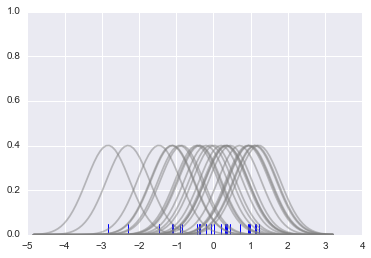

In [17]:
sns.rugplot(dataset)

#データセットの幅が欲しいのでxの最大・最小値を取得
x_min = dataset.min() - 2
x_max = dataset.max() + 2
#最大値・最大値を100等分した軸を作る
x_axis = np.linspace(x_min, x_max, 100)

#上記の推定量を計算する
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
#データポイントごとにカーネルを作る
for data_point in dataset:
    #１つのカーネルを作る
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #描写のためのコード
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='gray', alpha=0.5)

#y軸を0から1に指定
plt.ylim(0, 1)

## カーネル密度推定を完成させる

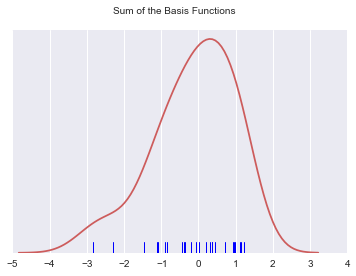

In [22]:
#一つ一つの分布を足し合わせる
sum_of_kde = np.sum(kernel_list, axis=0)

#描写
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
#y軸を消しているだけ
plt.yticks([])
plt.suptitle('Sum of the Basis Functions') #プロットのタイトル

### seabornを使って簡単にプロットする
上記のようなコードを毎回書くのは大変

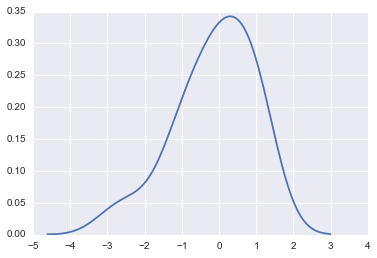

In [24]:
#1行でできる
sns.kdeplot(dataset)

---
# 2.カーネル密度推定の詳しい説明
バンド幅の違いによって、カーネル密度推定がどうなるか?

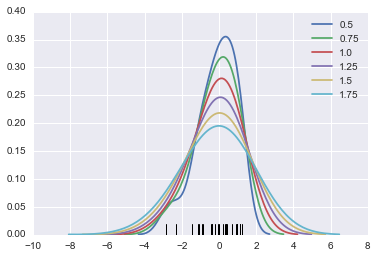

In [25]:
#rugplotでわかりやすくデータセットを描写
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

### バンド幅がそのデータポイントの影響がどこまで広がるのか？
 - バンド幅が小さい：あまり広がらない
 - バンド幅が大きい：全体的に裾野が広がる

---
# 3.他の密度関数を使う
今までは正規分布を使っていた。その他の密度関数はhttps://en.wikipedia.org/wiki/Kernel_(statistics)#In_non-parametric_statistics

いろいろな関数を用いてカーネル密度推定ができる。

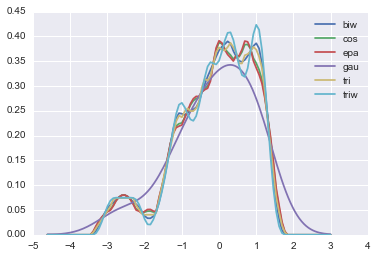

In [31]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

いろいろな関数によって最終的なカーネル密度が変わる

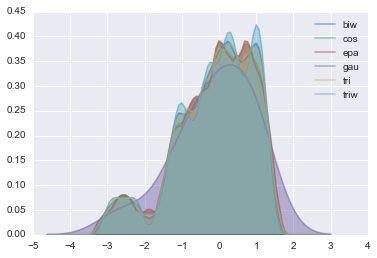

In [33]:
#グラフに影(shade)を適用することもできる
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

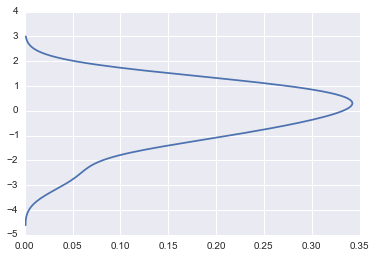

In [35]:
#軸を入れ替えることもできる
sns.kdeplot(dataset,vertical=True)

---
# 4.累積分布関数
データの累積を描写するヒストグラム

(array([  1.,   2.,   2.,   3.,   7.,   8.,  12.,  17.,  19.,  25.]),
 array([-2.82988542, -2.42499021, -2.02009501, -1.6151998 , -1.21030459,
        -0.80540938, -0.40051417,  0.00438104,  0.40927625,  0.81417146,
         1.21906667]),
 <a list of 10 Patch objects>)

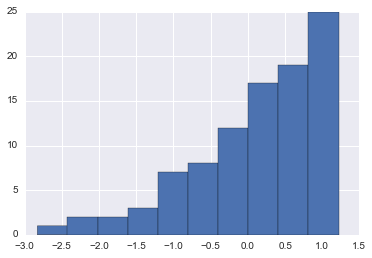

In [36]:
plt.hist(dataset, cumulative=True)

累積分布関数に関してもカーネル密度関数を適用することができる

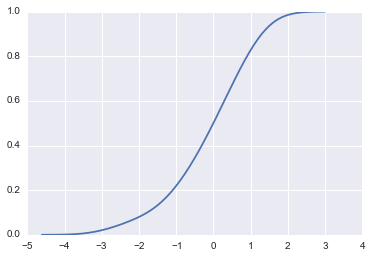

In [38]:
#cumulativeをTrueに
sns.kdeplot(dataset, cumulative=True)

---
# 5.多変量のカーネル密度推定

In [44]:
mean = [0, 0] #変数1と変数2の平均値は0とする
cov = [[1, 0],[0, 100]] #それぞれの分散を決める
#多変量の正規分布
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

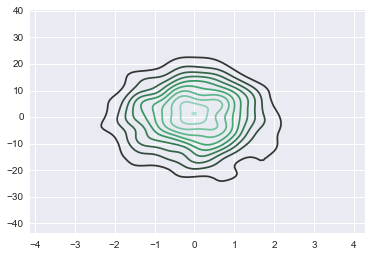

In [45]:
dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe)

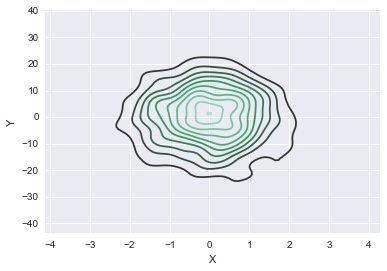

In [46]:
#軸ごとにデータを渡す
sns.kdeplot(dframe.X, dframe.Y)

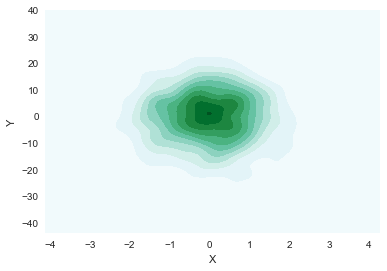

In [47]:
#密度ごとに影(shade)をつける
sns.kdeplot(dframe.X, dframe.Y, shade=True)

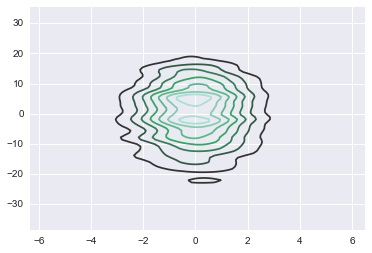

In [48]:
#バンド幅を指定
sns.kdeplot(dframe, bw=1)

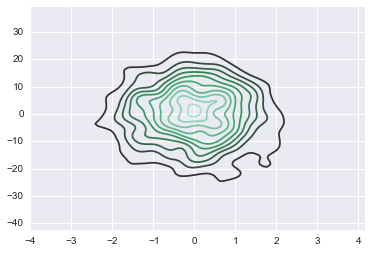

In [49]:
sns.kdeplot(dframe, bw='silverman')

---
# 6.カーネル密度推定を使って同時分布を描く

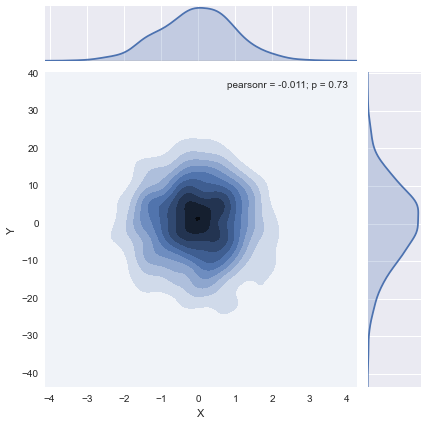

In [50]:
sns.jointplot('X', 'Y', dframe, kind='kde')